<a href="https://colab.research.google.com/github/vest1ter/machin_learning/blob/master/MnistTrueModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import torch
from torchvision.datasets import MNIST
import torchvision as tv
import matplotlib.pyplot as plt
import torch.nn as nn
#%matplotlib inline
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn.functional as F
import cv2
import numpy as np
from tqdm import tqdm

In [26]:
trans = tv.transforms.Compose([
    tv.transforms.ToTensor(),
    tv.transforms.Normalize((0.5,), (0.5,))
])

ds_mnist = tv.datasets.MNIST("./datasets", download = True, transform=trans)

print(len(ds_mnist))


60000


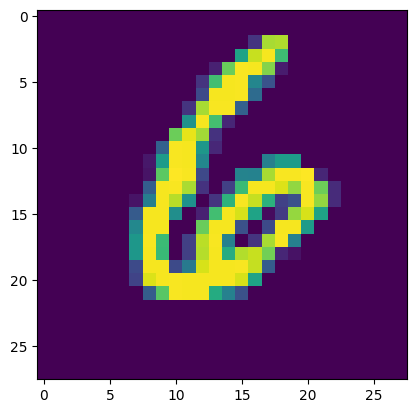

In [27]:
tes = (ds_mnist[13][0].numpy()[0])

tes = torch.from_numpy(tes)
plt.imshow(tes)

In [28]:
train_data, test_data = random_split(ds_mnist, [50000, 10000])


DEVICE = "cpu"

In [29]:
batch_size = 128
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle = True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle = False)

In [30]:
for images, labels in train_loader:
    print(labels.shape)
    print(images.shape)
    break

torch.Size([128])
torch.Size([128, 1, 28, 28])


In [31]:
class Perceptron(nn.Module):
  def __init__(self):
    super(Perceptron, self).__init__()
    self.l1 = nn.Linear(784, 128)
    self.l2 = nn.Linear(128, 10)

  def forward(self, x):
    x = x.view(-1, 784)
    x = F.relu(self.l1(x))
    x = self.l2(x)
    return F.log_softmax(x, dim=-1)

In [38]:
model = Perceptron()
optimazer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss = nn.CrossEntropyLoss()

In [41]:
epoch = 10

for epoch in range(epoch):
  loss_val=0
  acc_val = 0
  for img, label in tqdm(train_loader):
    img, label = img.float().to(DEVICE), label.long().to(DEVICE)
    optimazer.zero_grad()
    #label = F.one_hot(label, 10).float()

    pred = model(img)
    loss_fn = loss(pred, label)
    loss_fn.backward()
    optimazer.step()

  model.eval()
  for img, label in tqdm(test_loader):
    img, label = img.float().to(DEVICE), label.long().to(DEVICE)
    pred = model(img)
    loss_val += loss(pred, label)
  loss_val /= len(test_loader.dataset)
  print(f'epoch: {epoch};  loss:{round(loss_fn.item(), 4)}\t val_loss: {loss_val}')


100%|██████████| 79/79 [00:03<00:00, 23.19it/s]


epoch: 0;  loss:0.3544	 val_loss: 0.0027074101381003857


100%|██████████| 79/79 [00:02<00:00, 29.24it/s]


epoch: 1;  loss:0.2644	 val_loss: 0.0024893973022699356


100%|██████████| 79/79 [00:03<00:00, 21.90it/s]


epoch: 2;  loss:0.3245	 val_loss: 0.0023141789715737104


100%|██████████| 79/79 [00:03<00:00, 23.42it/s]


epoch: 3;  loss:0.3108	 val_loss: 0.0022129318676888943


100%|██████████| 79/79 [00:03<00:00, 21.65it/s]


epoch: 4;  loss:0.311	 val_loss: 0.0021083734463900328


100%|██████████| 79/79 [00:02<00:00, 28.79it/s]


epoch: 5;  loss:0.1942	 val_loss: 0.0019892866257578135


100%|██████████| 79/79 [00:03<00:00, 24.05it/s]


epoch: 6;  loss:0.2321	 val_loss: 0.001889082952402532


100%|██████████| 79/79 [00:02<00:00, 28.93it/s]


epoch: 7;  loss:0.2264	 val_loss: 0.0018074472900480032


100%|██████████| 79/79 [00:03<00:00, 25.56it/s]


epoch: 8;  loss:0.1931	 val_loss: 0.001720763393677771


100%|██████████| 79/79 [00:02<00:00, 29.22it/s]

epoch: 9;  loss:0.2343	 val_loss: 0.001648467849008739


In [50]:
img = cv2.imread('/content/Ry0v6.png', cv2.IMREAD_GRAYSCALE)
img = np.expand_dims(img, axis = 0)
img = np.expand_dims(img, axis = 0)
img =img.astype(np.float32)/255.0
img = torch.from_numpy(img)

pred = model(img)
pred = torch.argmax(pred, -1)

print(pred)
# Анализ предсказания
'''
predicted_class = torch.argmax(output).item()
print("Predicted class:", predicted_class)
'''

tensor([1])


'\npredicted_class = torch.argmax(output).item()\nprint("Predicted class:", predicted_class)\n'